> Project Name : Titanic: Machine Learning from Disaster

> The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

> 1. Required in this project : Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
2. Build a predictive model that answers the question: “what sorts of people were amore likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


> What is mean Data Pre-processing ? and why you use it?

  Data Pre-processing it is one of the most important steps data mining.The way you collect data is often controlled incorrectly, result out of range for example: income= -100 , or impossible data for example: gender:male -> prednant:yes , or missing data. Analyzing data that has not been examined carefully can lead to misleading or illogical results. If a lot of data is irrelevant or unorganized. discovered during training take large amount of processing time so we uesd data preprocessing




> What are the Data Pre-processing steps?

1. Importing The Libraries

2. Importing The Dataset

3. Missing Data

4. Encoding categorical data

5. Feature Selection

6. Feature Scaling

7. Splitting the dataset into the Training set and Test set

> The Algorithms used in the Project : -

1. Logistic Regression
2. Support Vector Machine [ SVM ]
3. K Nearest Neighbors [ KNN ]
4. Decision Tree
5. Random Force
6. Naive Bayes



> Evaluation Classification Methods Performance : - [ Metrics Model ]

1. Accurnce Score
2. Confusion Matrix
3. Classification Report
4. ROC Curve && AUC [ Area Under The Curve ]
5. Cross Validation 
6. Grid Search

> Compare all the algorithm of the AUC

In [1]:
#Importing The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing The Dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')
print('Train Data: \n\n',train.head(10))
print('*******************************************************')
print('Train Data Shape: ',train.shape)
print('*******************************************************')
print(train.columns)
print('*******************************************************')

Train Data: 

    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timoth

In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
print('Test Data: \n\n',test.head(10))
print('*******************************************************')
print('Test Data Shape: ',test.shape)
print('*******************************************************')
print(test.columns)
print('*******************************************************')

Test Data: 

    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   Na

In [4]:
#Drop Unless Columns
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
print(train.head(10))
print('**************************************************************')
print(test.head(10))


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C
**************************************************************
   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2   

In [5]:
print(train.columns)
print(train.shape)
print('**************************************************************')
print(test.columns)
print(test.shape)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
(891, 8)
**************************************************************
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
(418, 8)


> Data Visualization

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Survived')

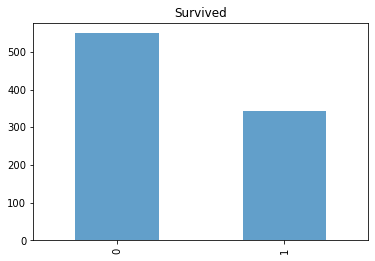

In [6]:
#To know the number of successful people and the number of deaths
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot(kind='bar',alpha=0.7)
plt.title('Survived')

male      577
female    314
Name: Sex, dtype: int64


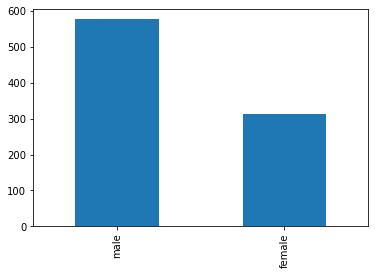

In [7]:
#To know the number of men and the number of women
print(train.Sex.value_counts())
train.Sex.value_counts().plot(kind='bar',)

0    468
1    109
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Surviveds for their Sex [ Male ]')

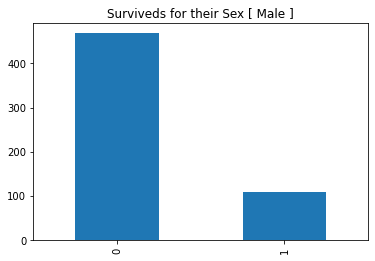

In [8]:
#To know how many men survived and how many men died
print(train.Survived[train.Sex=='male'].value_counts())
train.Survived[train.Sex=='male'].value_counts().plot(kind='bar',alpha=1)
plt.title('Surviveds for their Sex [ Male ]' )

1    233
0     81
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Surviveds for their Sex [ Female ]')

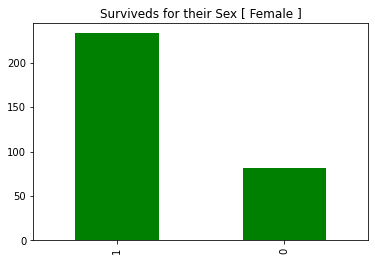

In [9]:
#To know how many men survived and how many men died
print(train.Survived[train.Sex=='female'].value_counts())
train.Survived[train.Sex=='female'].value_counts().plot(kind='bar',color='green')
plt.title('Surviveds for their Sex [ Female ]')

3    491
1    216
2    184
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'Surviveds for their P Class')

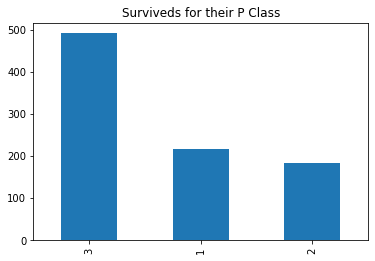

In [10]:
#To know the division of ship degrees
print(train['Pclass'].value_counts())
train['Pclass'].value_counts().plot(kind='bar')
plt.title('Surviveds for their P Class')

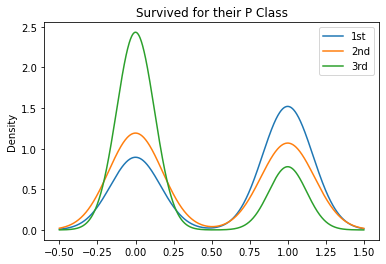

In [11]:
#To know how many people live in every class
for x in [1,2,3]:
  train.Survived[train.Pclass==x].plot(kind='kde')
plt.title('Survived for their P Class')
plt.legend(('1st','2nd','3rd'))

3    347
1    122
2    108
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'Pclass for their Sex [ Male ]')

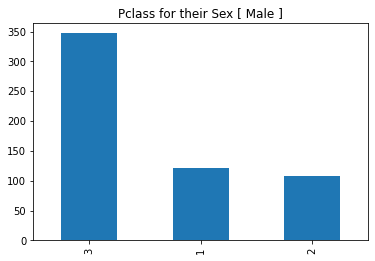

In [12]:
#To know how many men are in each class of ship
print(train.Pclass[train.Sex=='male'].value_counts())
train.Pclass[train.Sex=='male'].value_counts().plot(kind='bar',alpha=1)
plt.title('Pclass for their Sex [ Male ]' )

3    144
1     94
2     76
Name: Pclass, dtype: int64


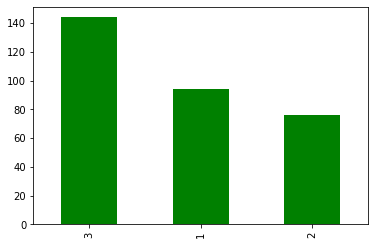

In [13]:
#To know how many women are in each class of ship
print(train.Pclass[train.Sex=='female'].value_counts())
train.Pclass[train.Sex=='female'].value_counts().plot(kind='bar',color='green')

0    77
1    45
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Rich Man Survived')

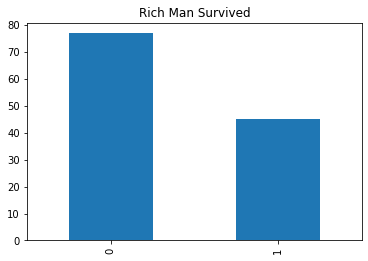

In [14]:
print(train.Survived[(train.Sex=='male')&(train.Pclass==1)].value_counts())
train.Survived[(train.Sex=='male')&(train.Pclass==1)].value_counts().plot(kind='bar')
plt.title('Rich Man Survived')

0    300
1     47
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Poor Man Survived')

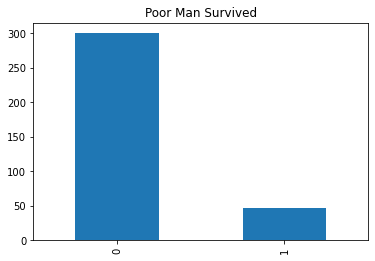

In [15]:
print(train.Survived[(train.Sex=='male')&(train.Pclass==3)].value_counts())
train.Survived[(train.Sex=='male')&(train.Pclass==3)].value_counts().plot(kind='bar')
plt.title('Poor Man Survived')

1    91
0     3
Name: Survived, dtype: int64


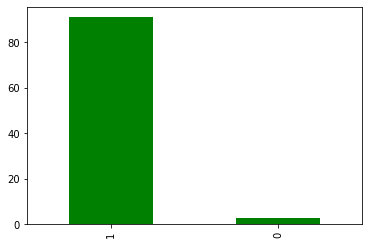

In [16]:
print(train.Survived[(train.Sex=='female')&(train.Pclass==1)].value_counts())
train.Survived[(train.Sex=='female')&(train.Pclass==1)].value_counts().plot(kind='bar',color='green')

1    72
0    72
Name: Survived, dtype: int64


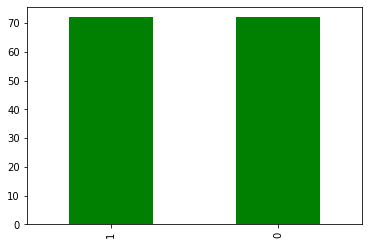

In [17]:
print(train.Survived[(train.Sex=='female')&(train.Pclass==3)].value_counts())
train.Survived[(train.Sex=='female')&(train.Pclass==3)].value_counts().plot(kind='bar',color='green')

Text(0, 0.5, 'Age')

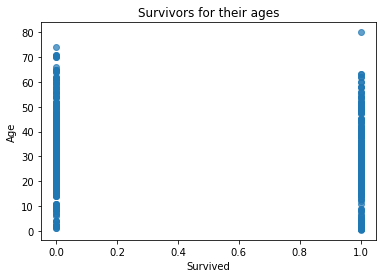

In [18]:
plt.scatter(train['Survived'],train['Age'],alpha=0.7)
plt.title('Survivors for their ages')
plt.xlabel('Survived')
plt.ylabel('Age')

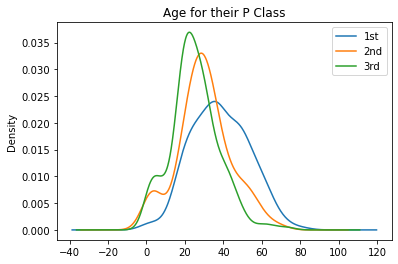

In [19]:
for x in [1,2,3]:
  train.Age[train.Pclass==x].plot(kind='kde')
plt.title('Age for their P Class')
plt.legend(('1st','2nd','3rd'))

Text(0, 0.5, 'Age')

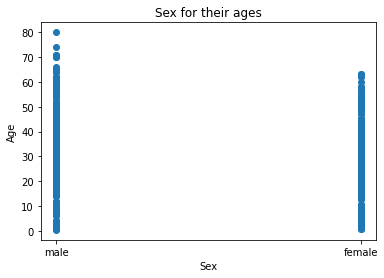

In [20]:
plt.scatter(train.Sex,train.Age)
plt.title('Sex for their ages')
plt.xlabel('Sex')
plt.ylabel('Age')

0    631
1    260
Name: Survived, dtype: int64


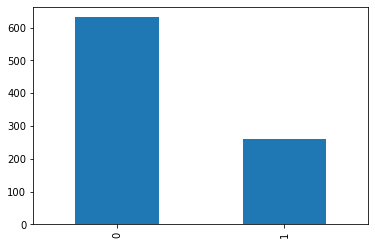

In [21]:
print(train.Survived[train.SibSp].value_counts())
train.Survived[train.SibSp].value_counts().plot(kind='bar')

0    688
1    203
Name: Survived, dtype: int64


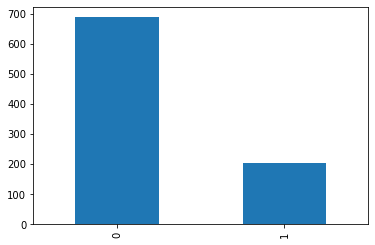

In [22]:
print(train.Survived[train.Parch].value_counts())
train.Survived[train.Parch].value_counts().plot(kind='bar')

In [23]:
Survived=train[train['Survived'].isin([1])]
Unsurvived=train[train['Survived'].isin([0])]
print('Survived',Survived)
print('Unsurvived',Unsurvived)

Survived      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
8           1       3  female  27.0      0      2  11.1333        S
9           1       2  female  14.0      1      0  30.0708        C
..        ...     ...     ...   ...    ...    ...      ...      ...
875         1       3  female  15.0      0      0   7.2250        C
879         1       1  female  56.0      0      1  83.1583        C
880         1       2  female  25.0      0      1  26.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C

[342 rows x 8 columns]
Unsurvived      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
4   

In [24]:
train.var()

Survived       0.236772
Pclass         0.699015
Age          211.019125
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

In [25]:
train.std()

Survived     0.486592
Pclass       0.836071
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

In [26]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


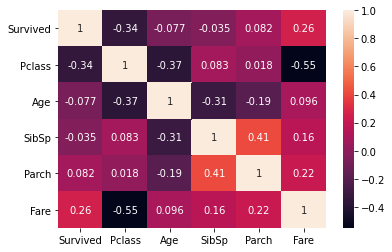

In [27]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

> Data Pre-processing

In [28]:
print(train.isnull().sum())
print('***********************************')
print(test.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
***********************************
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


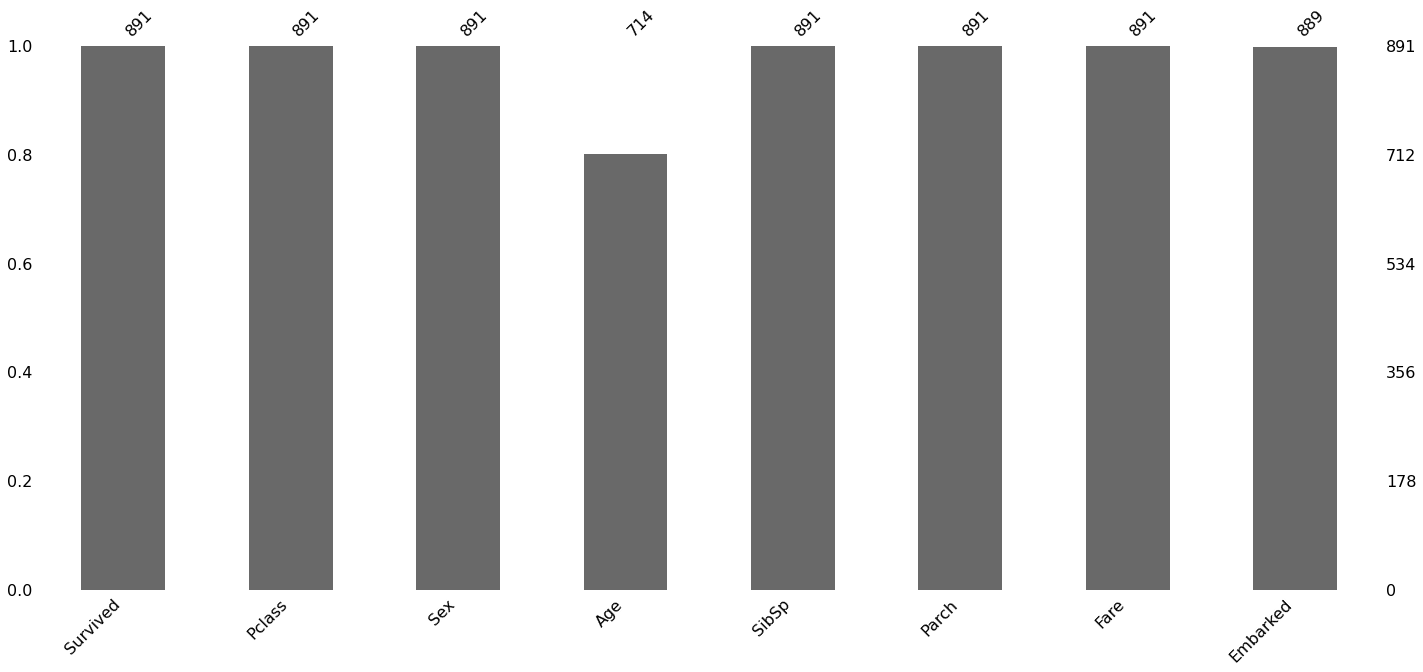

In [29]:
import missingno as msno
msno.bar(train)

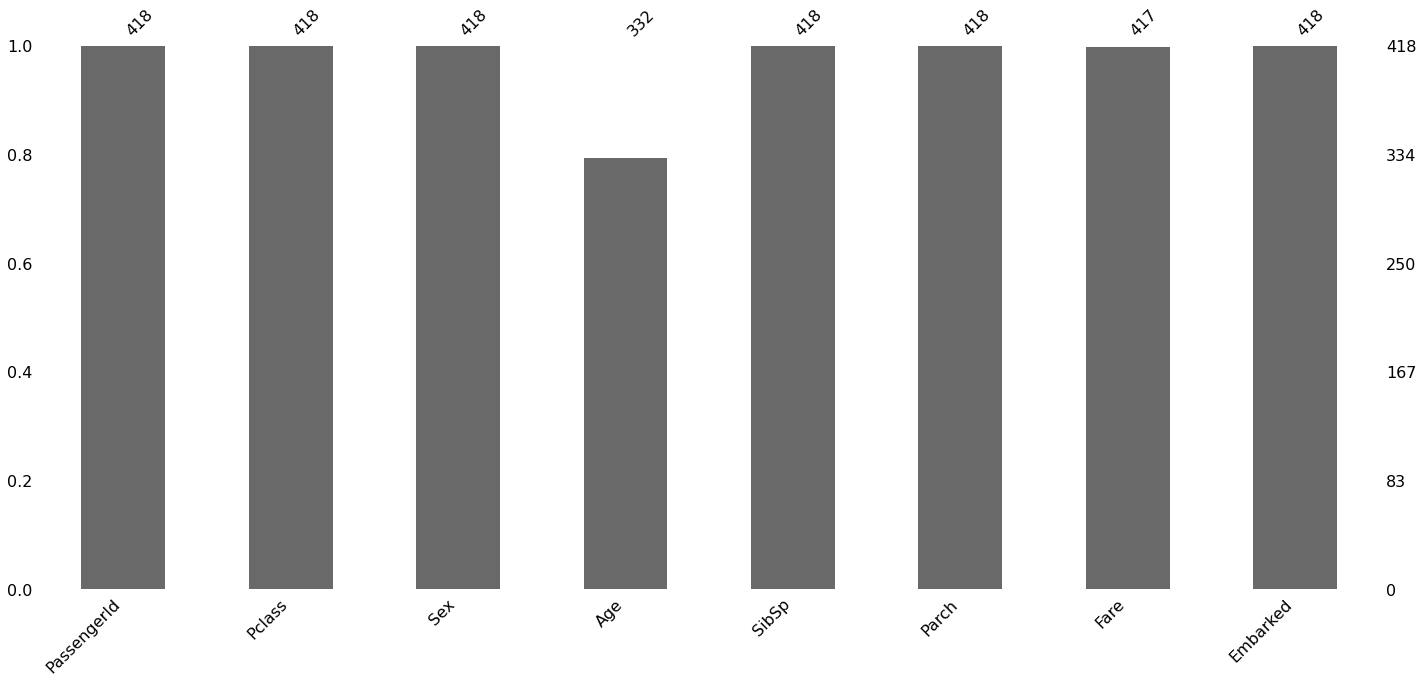

In [30]:
import missingno as msno
msno.bar(test)

In [31]:
X=train.iloc[:,1:].values
y=train.iloc[:,0:1].values
X_test_original=test.iloc[:,1:].values
print('X: ',X[:10,:])
print('X Shape: ',X.shape)
print('Y: ',y[:10,:])
print('Y_ Shape: ',y.shape)
print('X_test_original: ',X_test_original)
print('X_test_original: ',X_test_original.shape)

X:  [[3 'male' 22.0 1 0 7.25 'S']
 [1 'female' 38.0 1 0 71.2833 'C']
 [3 'female' 26.0 0 0 7.925 'S']
 [1 'female' 35.0 1 0 53.1 'S']
 [3 'male' 35.0 0 0 8.05 'S']
 [3 'male' nan 0 0 8.4583 'Q']
 [1 'male' 54.0 0 0 51.8625 'S']
 [3 'male' 2.0 3 1 21.075 'S']
 [3 'female' 27.0 0 2 11.1333 'S']
 [2 'female' 14.0 1 0 30.0708 'C']]
X Shape:  (891, 7)
Y:  [[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
Y_ Shape:  (891, 1)
X_test_original:  [[3 'male' 34.5 ... 0 7.8292 'Q']
 [3 'female' 47.0 ... 0 7.0 'S']
 [2 'male' 62.0 ... 0 9.6875 'Q']
 ...
 [3 'male' 38.5 ... 0 7.25 'S']
 [3 'male' nan ... 0 8.05 'S']
 [3 'male' nan ... 1 22.3583 'C']]
X_test_original:  (418, 7)


In [32]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy='median')
imputer2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:,2:3]=imputer1.fit_transform(X[:,2:3])
X[:,6:7]=imputer2.fit_transform(X[:,6:7])
X_test_original[:,2:3]=imputer1.fit_transform(X_test_original[:,2:3])
X_test_original[:,5:6]=imputer2.fit_transform(X_test_original[:,5:6])
print(X[:10,:])
print('***********************************')
print(X_test_original[:10,:])


[[3 'male' 22.0 1 0 7.25 'S']
 [1 'female' 38.0 1 0 71.2833 'C']
 [3 'female' 26.0 0 0 7.925 'S']
 [1 'female' 35.0 1 0 53.1 'S']
 [3 'male' 35.0 0 0 8.05 'S']
 [3 'male' 28.0 0 0 8.4583 'Q']
 [1 'male' 54.0 0 0 51.8625 'S']
 [3 'male' 2.0 3 1 21.075 'S']
 [3 'female' 27.0 0 2 11.1333 'S']
 [2 'female' 14.0 1 0 30.0708 'C']]
***********************************
[[3 'male' 34.5 0 0 7.8292 'Q']
 [3 'female' 47.0 1 0 7.0 'S']
 [2 'male' 62.0 0 0 9.6875 'Q']
 [3 'male' 27.0 0 0 8.6625 'S']
 [3 'female' 22.0 1 1 12.2875 'S']
 [3 'male' 14.0 0 0 9.225 'S']
 [3 'female' 30.0 0 0 7.6292 'Q']
 [2 'male' 26.0 1 1 29.0 'S']
 [3 'female' 18.0 0 0 7.2292 'C']
 [3 'male' 21.0 2 0 24.15 'S']]


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
dummy_variables = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X=dummy_variables.fit_transform(X)
X_test_original=dummy_variables.fit_transform(X_test_original)
le=LabelEncoder()
X[:,4]=le.fit_transform(X[:,4])
X_test_original[:,4]=le.fit_transform(X_test_original[:,4])
print(X[:10,:])
print('*********************')
print(X_test_original[:10,:])

[[0.0 0.0 1.0 3 1 22.0 1 0 7.25]
 [1.0 0.0 0.0 1 0 38.0 1 0 71.2833]
 [0.0 0.0 1.0 3 0 26.0 0 0 7.925]
 [0.0 0.0 1.0 1 0 35.0 1 0 53.1]
 [0.0 0.0 1.0 3 1 35.0 0 0 8.05]
 [0.0 1.0 0.0 3 1 28.0 0 0 8.4583]
 [0.0 0.0 1.0 1 1 54.0 0 0 51.8625]
 [0.0 0.0 1.0 3 1 2.0 3 1 21.075]
 [0.0 0.0 1.0 3 0 27.0 0 2 11.1333]
 [1.0 0.0 0.0 2 0 14.0 1 0 30.0708]]
*********************
[[0.0 1.0 0.0 3 1 34.5 0 0 7.8292]
 [0.0 0.0 1.0 3 0 47.0 1 0 7.0]
 [0.0 1.0 0.0 2 1 62.0 0 0 9.6875]
 [0.0 0.0 1.0 3 1 27.0 0 0 8.6625]
 [0.0 0.0 1.0 3 0 22.0 1 1 12.2875]
 [0.0 0.0 1.0 3 1 14.0 0 0 9.225]
 [0.0 1.0 0.0 3 0 30.0 0 0 7.6292]
 [0.0 0.0 1.0 2 1 26.0 1 1 29.0]
 [1.0 0.0 0.0 3 0 18.0 0 0 7.2292]
 [0.0 0.0 1.0 3 1 21.0 2 0 24.15]]


In [34]:
#avoiding  the dummy variables trap
X= X[ : , 1:]

In [35]:
#avoiding  the dummy variables trap
X_test_original= X_test_original[ : , 1:]

In [36]:
print(X[:10,:])
print('******************')
print(X_test_original[:10,:])

[[0.0 1.0 3 1 22.0 1 0 7.25]
 [0.0 0.0 1 0 38.0 1 0 71.2833]
 [0.0 1.0 3 0 26.0 0 0 7.925]
 [0.0 1.0 1 0 35.0 1 0 53.1]
 [0.0 1.0 3 1 35.0 0 0 8.05]
 [1.0 0.0 3 1 28.0 0 0 8.4583]
 [0.0 1.0 1 1 54.0 0 0 51.8625]
 [0.0 1.0 3 1 2.0 3 1 21.075]
 [0.0 1.0 3 0 27.0 0 2 11.1333]
 [0.0 0.0 2 0 14.0 1 0 30.0708]]
******************
[[1.0 0.0 3 1 34.5 0 0 7.8292]
 [0.0 1.0 3 0 47.0 1 0 7.0]
 [1.0 0.0 2 1 62.0 0 0 9.6875]
 [0.0 1.0 3 1 27.0 0 0 8.6625]
 [0.0 1.0 3 0 22.0 1 1 12.2875]
 [0.0 1.0 3 1 14.0 0 0 9.225]
 [1.0 0.0 3 0 30.0 0 0 7.6292]
 [0.0 1.0 2 1 26.0 1 1 29.0]
 [0.0 0.0 3 0 18.0 0 0 7.2292]
 [0.0 1.0 3 1 21.0 2 0 24.15]]


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X_test_original=sc.fit_transform(X_test_original)
print(X)
print('*************************************')
print(X_test_original)

[[-0.30756234  0.61583843  0.82737724 ...  0.43279337 -0.47367361
  -0.50244517]
 [-0.30756234 -1.62380254 -1.56610693 ...  0.43279337 -0.47367361
   0.78684529]
 [-0.30756234  0.61583843  0.82737724 ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [-0.30756234  0.61583843  0.82737724 ...  0.43279337  2.00893337
  -0.17626324]
 [-0.30756234 -1.62380254 -1.56610693 ... -0.4745452  -0.47367361
  -0.04438104]
 [ 3.25137334 -1.62380254  0.82737724 ... -0.4745452  -0.47367361
  -0.49237783]]
*************************************
[[ 2.84375747 -1.35067551  0.87348191 ... -0.49947002 -0.4002477
  -0.49706313]
 [-0.35164743  0.74037028  0.87348191 ...  0.61699237 -0.4002477
  -0.51192594]
 [ 2.84375747 -1.35067551 -0.31581919 ... -0.49947002 -0.4002477
  -0.46375447]
 ...
 [-0.35164743  0.74037028  0.87348191 ... -0.49947002 -0.4002477
  -0.50744487]
 [-0.35164743  0.74037028  0.87348191 ... -0.49947002 -0.4002477
  -0.49310546]
 [-0.35164743 -1.35067551  0.87348191 ...  0.61699237  0.61989583

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
LR=LogisticRegression(C=0.01,random_state=22)
CrossValidateValues1 = cross_validate(LR,X,y,cv=10,return_train_score = True)
CrossValidateValues2 = cross_validate(LR,X,y,cv=10,scoring=('r2','neg_mean_squared_error'),return_train_score = True)

# Showing Results
print('Train Score Value : ', CrossValidateValues1['train_score'])
print('Test Score Value : ', CrossValidateValues1['test_score'])
print('Fit Time : ', CrossValidateValues1['fit_time'])
print('Score Time : ', CrossValidateValues1['score_time'])
print('Train MSE Value : ', CrossValidateValues2['train_neg_mean_squared_error'])
print('Test MSE Value : ', CrossValidateValues2['test_neg_mean_squared_error'])
print('Train R2 Value : ', CrossValidateValues2['train_r2'])
print('Test R2 Value : ', CrossValidateValues2['test_r2'])


print('//////////////////////////////////////')


# Showing Results

accuracies = cross_val_score(estimator = LR, X = X, y = y, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Train Score Value :  [0.81523096 0.81670823 0.82044888 0.80673317 0.81296758 0.81296758
 0.80673317 0.81047382 0.80673317 0.80922693]
Test Score Value :  [0.78888889 0.80898876 0.7752809  0.85393258 0.83146067 0.78651685
 0.79775281 0.75280899 0.86516854 0.78651685]
Fit Time :  [0.01244664 0.00590992 0.00576019 0.00564551 0.00598717 0.0057261
 0.00610304 0.00577736 0.00686836 0.00581908]
Score Time :  [0.00072479 0.00060582 0.00057101 0.00059891 0.00056648 0.00057817
 0.00060821 0.00056171 0.00059342 0.00057602]
Train MSE Value :  [-0.18476904 -0.18329177 -0.17955112 -0.19326683 -0.18703242 -0.18703242
 -0.19326683 -0.18952618 -0.19326683 -0.19077307]
Test MSE Value :  [-0.21111111 -0.19101124 -0.2247191  -0.14606742 -0.16853933 -0.21348315
 -0.20224719 -0.24719101 -0.13483146 -0.21348315]
Train R2 Value :  [0.21832017 0.22515642 0.24096956 0.18298806 0.20934329 0.20934329
 0.18298806 0.1988012  0.18298806 0.19253776]
Test R2 Value :  [ 0.11168831  0.19090909  0.04812834  0.38128342  0

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Accuracy: 80.47 %
Standard Deviation: 3.37 %


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [39]:
LR.fit(X,y)
print('Logistic Regression Train Score :',LR.score(X,y))

Logistic Regression Train Score : 0.8103254769921436


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [40]:
y_predict_LR=LR.predict(X)
print('Y Predict: ',y_predict_LR)

Y Predict:  [0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 

[[494  55]
 [114 228]]


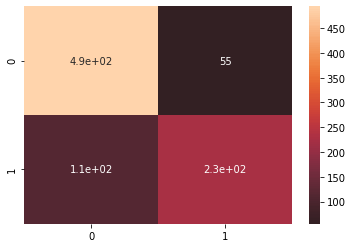

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
CM_LR=confusion_matrix(y,y_predict_LR)
print(CM_LR)
sns.heatmap(CM_LR,center=True,annot=True)

In [42]:
from sklearn.metrics import accuracy_score
acc_LR=accuracy_score(y,y_predict_LR)
print(acc_LR)

0.8103254769921436


In [43]:
from sklearn.metrics import classification_report
CR_LR=classification_report(y,y_predict_LR)
print(CR_LR)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       549
           1       0.81      0.67      0.73       342

    accuracy                           0.81       891
   macro avg       0.81      0.78      0.79       891
weighted avg       0.81      0.81      0.81       891



LR_tpr:  [0.         0.10018215 1.        ]
LR_fpr:  [0.         0.66666667 1.        ]
threshold:  [2 1 0]


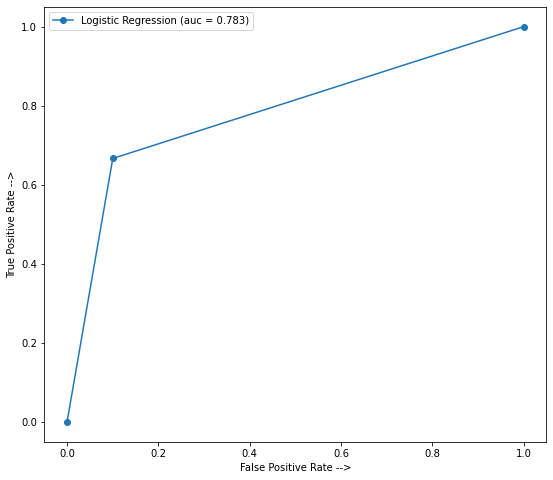

In [44]:
from sklearn.metrics import roc_curve,auc
LR_tpr,LR_fpr,threshold=roc_curve(y,y_predict_LR)
LR_auc = auc(LR_tpr, LR_fpr)
print('LR_tpr: ',LR_tpr)
print('LR_fpr: ',LR_fpr)
print('threshold: ',threshold)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 8))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
SVM=SVC(C=0.6,kernel='rbf',random_state=22)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM, X = X, y = y, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('/////////////////////')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Accuracy: 82.72 %
Standard Deviation: 3.66 %
/////////////////////


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
SVM.fit(X,y)
print('Logistic Regression Train Score :',SVM.score(X,y))

Logistic Regression Train Score : 0.8383838383838383


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [47]:
y_predict_SVM=SVM.predict(X)
print(y_predict_SVM)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 

[[506  43]
 [101 241]]


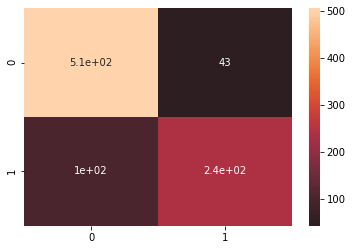

In [48]:
from sklearn.metrics import  confusion_matrix
CM_SVM=confusion_matrix(y,y_predict_SVM)
print(CM_SVM)
sns.heatmap(CM_SVM,center=True,annot=True)

In [49]:
from sklearn.metrics import accuracy_score
acc_svm=accuracy_score(y,y_predict_SVM)
print(acc_svm)

0.8383838383838383


In [50]:
from sklearn.metrics import classification_report
CR_SVM=classification_report(y,y_predict_SVM)
print(CR_SVM)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       549
           1       0.85      0.70      0.77       342

    accuracy                           0.84       891
   macro avg       0.84      0.81      0.82       891
weighted avg       0.84      0.84      0.83       891



svm_tpr [0.         0.07832423 1.        ]
svm_fpr [0.         0.70467836 1.        ]
threshold [2 1 0]


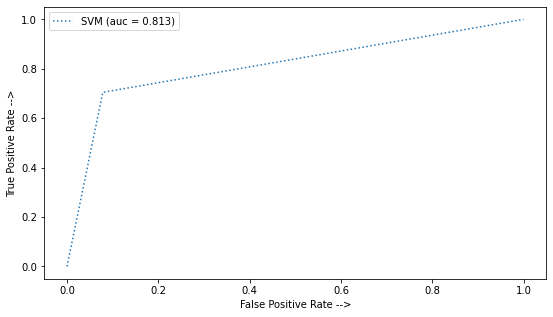

In [51]:
from sklearn.metrics import roc_curve,auc
svm_tpr,svm_fpr,threshold=roc_curve(y,y_predict_SVM)
svm_auc=auc(svm_tpr,svm_fpr)
print('svm_tpr',svm_tpr)
print('svm_fpr',svm_fpr)
print('threshold',threshold)


#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(svm_tpr, svm_fpr, linestyle=':', label='SVM (auc = %0.3f)' % svm_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
knn=KNeighborsClassifier(n_neighbors=15,metric = 'minkowski', p = 1)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('/////////////////////')

Accuracy: 81.71 %
Standard Deviation: 2.90 %
/////////////////////


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

In [53]:
knn.fit(X,y)
print('KNN Train Score :',knn.score(X,y))

KNN Train Score : 0.8439955106621774


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [54]:
y_predict_knn=knn.predict(X)
print(y_predict_knn)

[0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 

[[507  42]
 [ 97 245]]


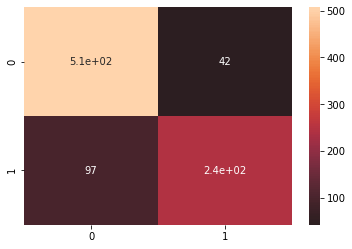

In [55]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y,y_predict_knn)
print(cm_knn)
sns.heatmap(cm_knn,center=True,annot=True)

In [56]:
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y,y_predict_knn)
print(acc_knn)

0.8439955106621774


In [57]:
from sklearn.metrics import classification_report
cr_knn=classification_report(y,y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.85      0.72      0.78       342

    accuracy                           0.84       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



True Positive Rate [0.         0.07650273 1.        ]
False Positive Rate [0.         0.71637427 1.        ]
threshold [2 1 0]


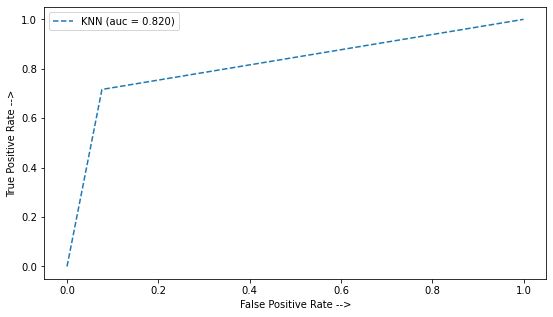

In [58]:
from sklearn.metrics import roc_curve,auc
knn_tpr,knn_fpr,threshold=roc_curve(y,y_predict_knn)
print('True Positive Rate',knn_tpr)
print('False Positive Rate',knn_fpr)
print('threshold',threshold)

knn_auc=auc(knn_tpr,knn_fpr)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(knn_tpr, knn_fpr, linestyle='--', label='KNN (auc = %0.3f)' %knn_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier(max_depth=6,max_features=4,min_samples_split=6,random_state=22)

parameters = [{'max_depth': [2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               'min_samples_split': [2,4,6,8,10,12,14,16,18],
               'max_features' : [2,4,6,8,10,12]
               }]
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.96 %
Best Parameters: {'max_depth': 6, 'max_features': 6, 'min_samples_split': 12}


In [60]:
dt.fit(X,y)
print(' DecisionTree Train Score :',dt.score(X,y))
print('DecisionTree Classifier Model feature importances are :\n ' , dt.feature_importances_)

 DecisionTree Train Score : 0.8529741863075196
DecisionTree Classifier Model feature importances are :
  [3.62850659e-04 1.22348925e-02 1.89362737e-01 4.94850083e-01
 1.32451142e-01 8.52977846e-03 1.65356387e-02 1.45672878e-01]


In [61]:
y_predict_dt=dt.predict(X)
print(y_predict_dt)

[0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 

In [62]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y,y_predict_dt)
print(acc_dt)

0.8529741863075196


[[528  21]
 [110 232]]


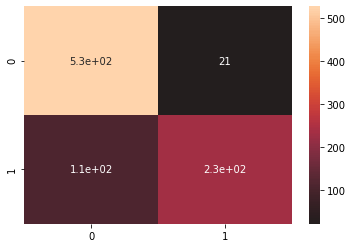

In [63]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y,y_predict_dt)
print(cm_dt)
sns.heatmap(cm_dt,center=True,annot=True)

In [64]:
from sklearn.metrics import classification_report
cr_dt=classification_report(y,y_predict_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       549
           1       0.92      0.68      0.78       342

    accuracy                           0.85       891
   macro avg       0.87      0.82      0.83       891
weighted avg       0.86      0.85      0.85       891



True Positive Rate [0.         0.03825137 1.        ]
False Positive Rate [0.         0.67836257 1.        ]
threshold [2 1 0]


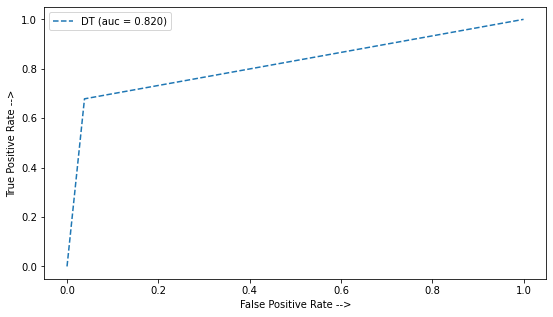

In [65]:
from sklearn.metrics import roc_curve,auc
dt_tpr,dt_fpr,threshold=roc_curve(y,y_predict_dt)
print('True Positive Rate',dt_tpr)
print('False Positive Rate',dt_fpr)
print('threshold',threshold)

dt_auc=auc(dt_tpr,dt_fpr)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(dt_tpr, dt_fpr, linestyle='--', label='DT (auc = %0.3f)' %dt_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()



In [66]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(criterion = 'entropy',max_depth=10,n_estimators=12,min_samples_split=20)
rf.fit(X,y)
print(' RandomForest Train Score :',rf.score(X,y))
print('RandomForest Classifier Model feature importances are :\n ' , rf.feature_importances_)

 RandomForest Train Score : 0.8664421997755332
RandomForest Classifier Model feature importances are :
  [0.01315791 0.02923176 0.11858282 0.3937308  0.17477561 0.04646739
 0.04556367 0.17849005]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
y_pred_rf=rf.predict(X)
print('Y Pred',y_pred_rf)

Y Pred [0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1

[[520  29]
 [ 90 252]]


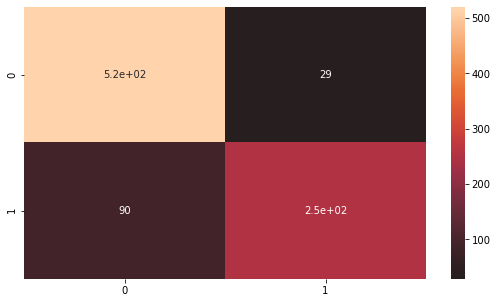

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred_rf)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [69]:
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y,y_pred_rf)
print('Accuracy Score',acc_rf)

Accuracy Score 0.8664421997755332


In [70]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [2,4,6,7,8,9,10,11,12,13,14,15,16],
               'min_samples_split': [2,4,6,8,10,12,14,16,18,19,20],
               'n_estimators' : [2,4,6,8,10,12]
               }]
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.73 %
Best Parameters: {'max_depth': 11, 'min_samples_split': 8, 'n_estimators': 12}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [71]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X, y = y, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('******************************')

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Accuracy: 82.95 %
Standard Deviation: 4.58 %
******************************


In [72]:
from sklearn.metrics import classification_report
cr=classification_report(y,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       549
           1       0.90      0.74      0.81       342

    accuracy                           0.87       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.87      0.87      0.86       891



rf_tpr Value  :  [0.         0.05282332 1.        ]
rf_fpr Value  :  [0.         0.73684211 1.        ]
thresholds Value  :  [2 1 0]


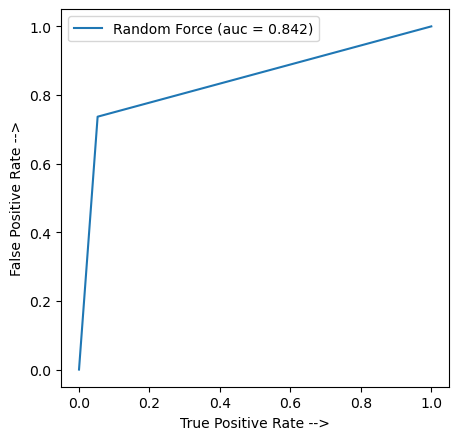

In [73]:
from sklearn.metrics import roc_curve,auc
rf_tpr,rf_fpr,threshold=roc_curve(y,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Force (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [74]:
from sklearn.naive_bayes import BernoulliNB
NB=BernoulliNB()
NB.fit(X,y)
print('Naive Bayse Train Score',NB.score(X,y))



Naive Bayse Train Score 0.7710437710437711


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
#Calculating Prediction
y_pred_NB = NB.predict(X)
y_pred_prob = NB.predict_proba(X)
y_pred_prob2=y_pred_prob.astype(int)
print('Y Test' ,y)
print('Predicted Value for BernoulliNBModel is : ' , y_pred_NB)
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob2)

Y Test [[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1

[[442 107]
 [ 97 245]]


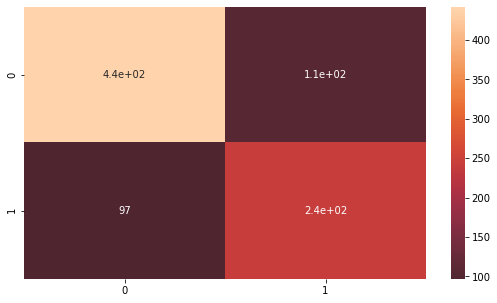

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred_NB)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)

In [77]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB, X = X, y = y, cv = 10)
accuracies2 = cross_val_score(estimator = NB, X = X, y = y, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('******************************')
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 76.44 %
Standard Deviation: 4.80 %
******************************
Accuracy: 76.44 %
Standard Deviation: 4.80 %


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [78]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(y,y_pred_NB)
print(acc_nb)

0.7710437710437711


In [79]:
from sklearn.metrics import classification_report
cr=classification_report(y,y_pred_NB)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       549
           1       0.70      0.72      0.71       342

    accuracy                           0.77       891
   macro avg       0.76      0.76      0.76       891
weighted avg       0.77      0.77      0.77       891



nb_tpr Value  :  [0.         0.19489982 1.        ]
nb_fpr Value  :  [0.         0.71637427 1.        ]
thresholds Value  :  [2 1 0]


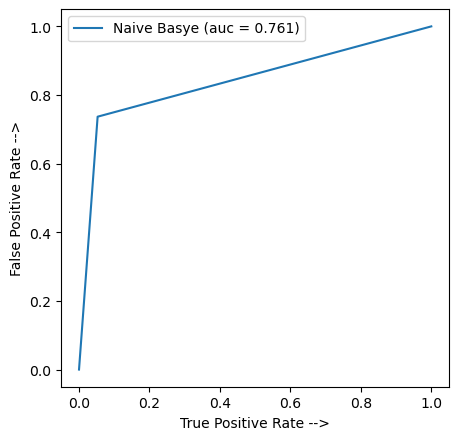

In [80]:
from sklearn.metrics import roc_curve,auc
nb_tpr,nb_fpr,threshold=roc_curve(y,y_pred_NB)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Naive Basye (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

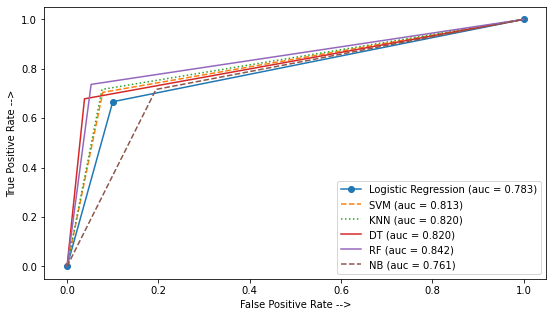

In [81]:
from sklearn.metrics import roc_curve, auc

LR_tpr,LR_fpr,threshold=roc_curve(y,y_predict_LR)
LR_auc = auc(LR_tpr, LR_fpr)

svm_fpr, svm_tpr, threshold = roc_curve(y, y_predict_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y, y_predict_knn)
auc_knn = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y, y_predict_dt)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)


nb_fpr, nb_tpr, threshold = roc_curve(y, y_pred_NB)
auc_nb = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(9, 5))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='NB (auc = %0.3f)' % auc_nb)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

In [82]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    'Score': [acc_LR, acc_svm, acc_knn, 
              acc_dt, acc_rf, acc_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.866442
3,Decision Tree,0.852974
2,KNN,0.843996
1,Support Vector Machines,0.838384
0,Logistic Regression,0.810325
5,Naive Bayes,0.771044


In [83]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions =rf.predict(X_test_original)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
